# DiabetesDataAnalysis By Ahmad Raza

In [101]:
## Data Analysis packages
import numpy as np
import pandas as pd

## Data Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
df = pd.read_csv('diabetes.csv')

# Data Preprocessing Part 1

In [103]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [104]:
df.shape

(768, 9)

In [105]:
#0 values came in thickness thats not right its a nan value
df['SkinThickness'].value_counts()

SkinThickness
0     227
32     31
30     27
27     23
23     22
33     20
28     20
18     20
31     19
19     18
39     18
29     17
40     16
25     16
26     16
22     16
37     16
41     15
35     15
36     14
15     14
17     14
20     13
24     12
42     11
13     11
21     10
46      8
34      8
12      7
38      7
11      6
43      6
16      6
45      6
14      6
44      5
10      5
48      4
47      4
49      3
50      3
8       2
7       2
52      2
54      2
63      1
60      1
56      1
51      1
99      1
Name: count, dtype: int64

In [106]:
#bloodpressure can never be a zero so it is nan values
df['BloodPressure'].value_counts()

BloodPressure
70     57
74     52
78     45
68     45
72     44
64     43
80     40
76     39
60     37
0      35
62     34
66     30
82     30
88     25
84     23
90     22
86     21
58     21
50     13
56     12
52     11
54     11
75      8
92      8
65      7
85      6
94      6
48      5
96      4
44      4
100     3
106     3
98      3
110     3
55      2
108     2
104     2
46      2
30      2
122     1
95      1
102     1
61      1
24      1
38      1
40      1
114     1
Name: count, dtype: int64

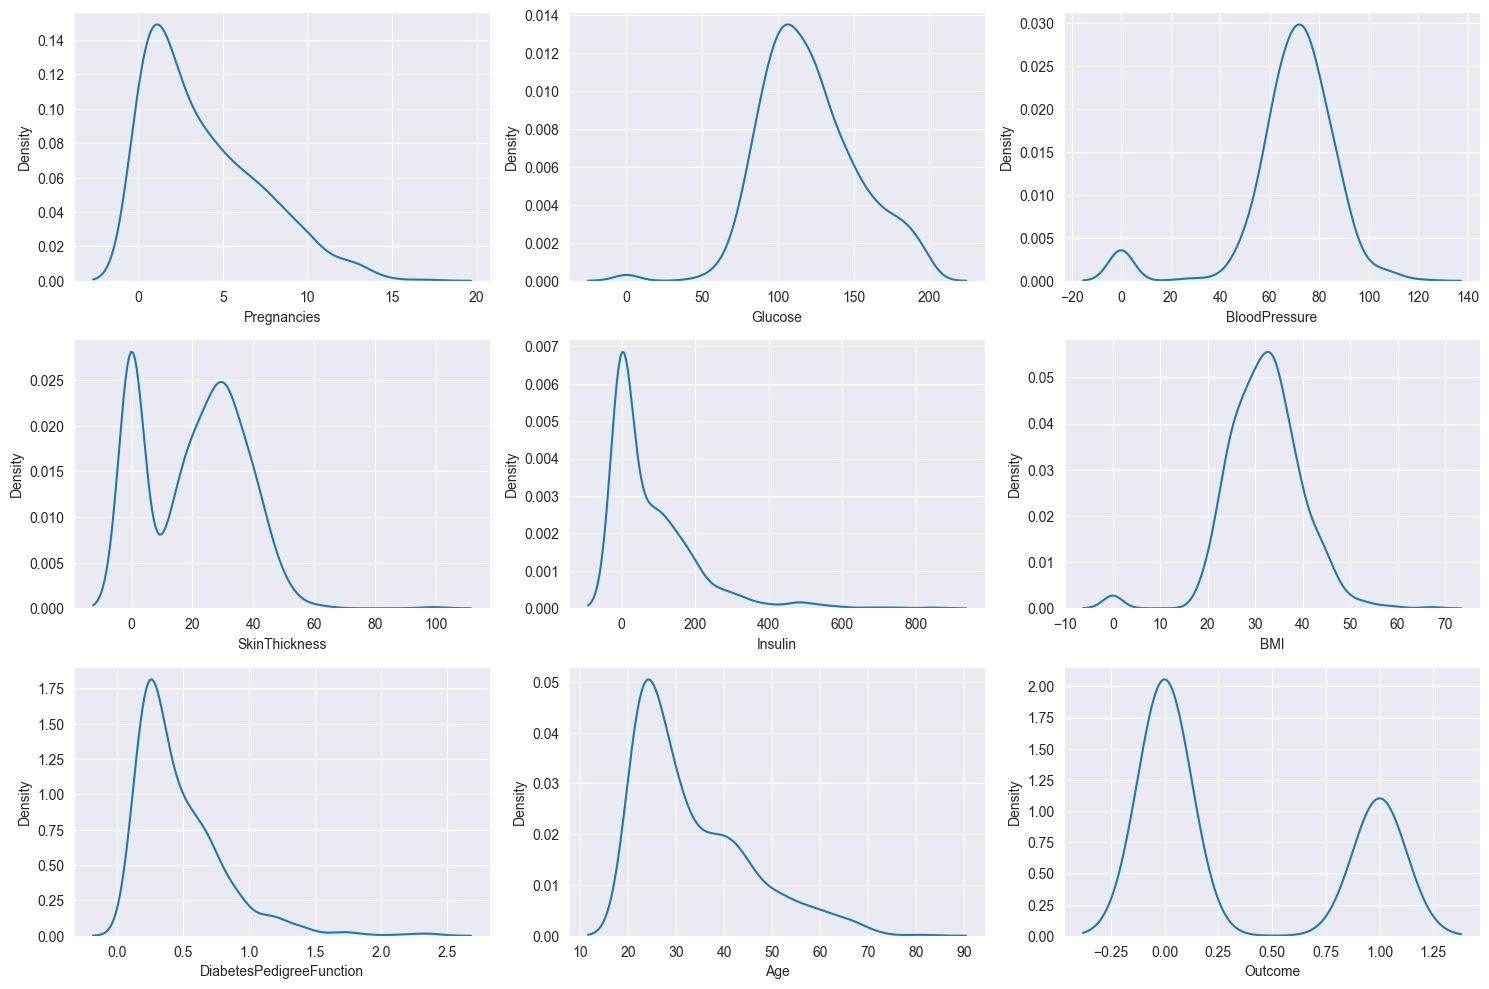

In [107]:
# we need to draw kernal density estimation to saw 0 values in all features except outcome feature
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    sns.kdeplot(x=var,data=df,ax=axs[i])

plt.tight_layout()
plt.show()

In [108]:
#there is 0 values in every columns means surely its nan value

In [109]:
#we need to replace that value to nan
df.replace({'Pregnancies':0,
            'Glucose':0,
            'BloodPressure':0,
            'SkinThickness':0,
            'Insulin':0,
            'BMI':0,
            'DiabetesPedigreeFunction':0,
            'Age':0},np.nan,inplace=True)

In [110]:
df.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [111]:
# we fill nan values in pregnancies feature using mode because mean or median change the ND shape
df['Pregnancies'] = df['Pregnancies'].fillna(df['Pregnancies'].mode()[0])

# mode used for  best shape of ND normal distribution
df['Glucose'] = df['Glucose'].fillna(df['Glucose'].mode()[0])

# mean and median shrink the shape of ND increase std that why i fill nan values with mode
df['BloodPressure'] = df['BloodPressure'].fillna(df['BloodPressure'].mode()[0])

# mean and median highly shrink the shape of ND increase std that why i fill nan values with mode
df['SkinThickness'] = df['SkinThickness'].fillna(df['SkinThickness'].mode()[0])

# mean and median highly shrink the shape of ND increase std that why i fill nan values with mode
df['Insulin'] = df['Insulin'].fillna(df['Insulin'].mode()[0])

# mean and median highly shrink the shape of ND increase std that why i fill nan values with mode
df['BMI'] = df['BMI'].fillna(df['BMI'].mode()[0])

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 54.1 KB


In [113]:
df['Pregnancies'] = df['Pregnancies'].astype('int')
df['Glucose'] = df['Glucose'].astype('int')
df['SkinThickness'] = df['SkinThickness'].astype('int')
df['Insulin'] = df['Insulin'].astype('int')
df['BloodPressure'] = df['BloodPressure'].astype('int')

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int32  
 1   Glucose                   768 non-null    int32  
 2   BloodPressure             768 non-null    int32  
 3   SkinThickness             768 non-null    int32  
 4   Insulin                   768 non-null    int32  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int32(5), int64(2)
memory usage: 39.1 KB


# Exploratary Data Analysis

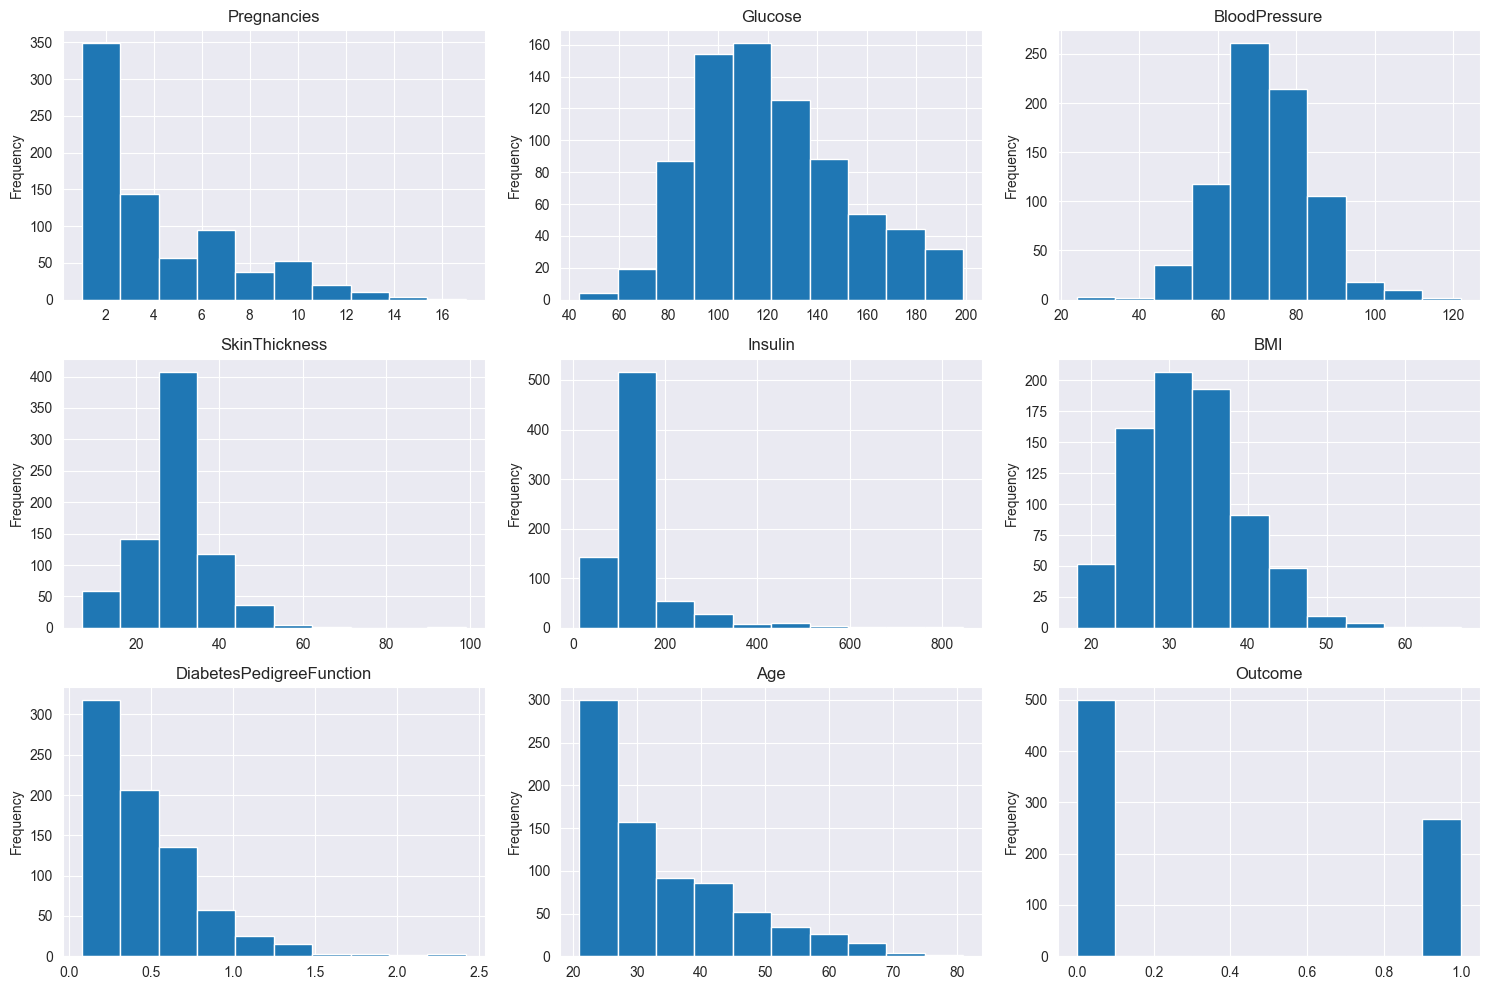

In [115]:
int_vars = df.select_dtypes(include = ['int','float'])

fig, axs = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
axs = axs.flatten()

for i, var in enumerate (int_vars):
    df[var].plot(kind='hist',ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()

In [116]:
Features_with_outliers=['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin','BMI',
                        'DiabetesPedigreeFunction','Age']

In [117]:
def remove_outliers_iqr(data):
    
    # Calculate the first quartile (Q1) and third quartile (Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Remove outliers
    data = np.where(data>upper_bound, upper_bound, np.where(data<lower_bound,lower_bound,data))
   
    return data[(data >= lower_bound) & (data <= upper_bound)]


In [118]:
for column in Features_with_outliers:
    df[column] = remove_outliers_iqr(df[column])

In [119]:
X = df.drop(columns=['Outcome'])  # Drop the 'target' column to get the features
y = df['Outcome']  # Scelect only the 'target' column as the target variable

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=10)

In [121]:
import mlflow.sklearn
mlflow.set_tracking_uri("http://127.0.0.1:9090")
mlflow.set_experiment(experiment_name="Practica1")

<Experiment: artifact_location='mlflow-artifacts:/4', creation_time=1715736535837, experiment_id='4', last_update_time=1715736535837, lifecycle_stage='active', name='Practica1', tags={}>

In [122]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [125]:
def classification_report(
    y_true,
    y_pred,
    *,
    labels=None,
    target_names=None,
    sample_weight=None,
    digits=2,
    output_dict=False,
    zero_division="warn",
):
    """Build a text report showing the main classification metrics.

    Read more in the :ref:`User Guide <classification_report>`.

    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.

    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.

    labels : array-like of shape (n_labels,), default=None
        Optional list of label indices to include in the report.

    target_names : array-like of shape (n_labels,), default=None
        Optional display names matching the labels (same order).

    sample_weight : array-like of shape (n_samples,), default=None
        Sample weights.

    digits : int, default=2
        Number of digits for formatting output floating point values.
        When ``output_dict`` is ``True``, this will be ignored and the
        returned values will not be rounded.

    output_dict : bool, default=False
        If True, return output as dict.

        .. versionadded:: 0.20

    zero_division : {"warn", 0.0, 1.0, np.nan}, default="warn"
        Sets the value to return when there is a zero division. If set to
        "warn", this acts as 0, but warnings are also raised.

        .. versionadded:: 1.3
           `np.nan` option was added.

    Returns
    -------
    report : str or dict
        Text summary of the precision, recall, F1 score for each class.
        Dictionary returned if output_dict is True. Dictionary has the
        following structure::

            {'label 1': {'precision':0.5,
                         'recall':1.0,
                         'f1-score':0.67,
                         'support':1},
             'label 2': { ... },
              ...
            }

        The reported averages include macro average (averaging the unweighted
        mean per label), weighted average (averaging the support-weighted mean
        per label), and sample average (only for multilabel classification).
        Micro average (averaging the total true positives, false negatives and
        false positives) is only shown for multi-label or multi-class
        with a subset of classes, because it corresponds to accuracy
        otherwise and would be the same for all metrics.
        See also :func:`precision_recall_fscore_support` for more details
        on averages.

        Note that in binary classification, recall of the positive class
        is also known as "sensitivity"; recall of the negative class is
        "specificity".

    See Also
    --------
    precision_recall_fscore_support: Compute precision, recall, F-measure and
        support for each class.
    confusion_matrix: Compute confusion matrix to evaluate the accuracy of a
        classification.
    multilabel_confusion_matrix: Compute a confusion matrix for each class or sample.

    Examples
    --------
    >>> from sklearn.metrics import classification_report
    >>> y_true = [0, 1, 2, 2, 2]
    >>> y_pred = [0, 0, 2, 2, 1]
    >>> target_names = ['class 0', 'class 1', 'class 2']
    >>> print(classification_report(y_true, y_pred, target_names=target_names))
                  precision    recall  f1-score   support
    <BLANKLINE>
         class 0       0.50      1.00      0.67         1
         class 1       0.00      0.00      0.00         1
         class 2       1.00      0.67      0.80         3
    <BLANKLINE>
        accuracy                           0.60         5
       macro avg       0.50      0.56      0.49         5
    weighted avg       0.70      0.60      0.61         5
    <BLANKLINE>
    >>> y_pred = [1, 1, 0]
    >>> y_true = [1, 1, 1]
    >>> print(classification_report(y_true, y_pred, labels=[1, 2, 3]))
                  precision    recall  f1-score   support
    <BLANKLINE>
               1       1.00      0.67      0.80         3
               2       0.00      0.00      0.00         0
               3       0.00      0.00      0.00         0
    <BLANKLINE>
       micro avg       1.00      0.67      0.80         3
       macro avg       0.33      0.22      0.27         3
    weighted avg       1.00      0.67      0.80         3
    <BLANKLINE>
    """
    
def model_Evaluate(model):
    
    # Predict values for Test dataset
    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.
    report = classification_report(y_test, y_pred, output_dict=True)
    
    return report

valor_C = 2
valor_max_iter = 1000
valor_n_jobs = -1
with mlflow.start_run(run_name="LR_Run") as run:
    LRmodel = LogisticRegression(C=valor_C, max_iter=valor_max_iter, n_jobs=valor_n_jobs)
    LRmodel.fit(X_train, y_train)
    report = model_Evaluate(LRmodel)
    y_pred = LRmodel.predict(X_test)
    ccuracy = accuracy_score(y_test,y_pred)
    
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("C", valor_C)
    mlflow.log_param("max_iter", valor_max_iter)
    mlflow.log_metric("accuracy", ccuracy)
    mlflow.sklearn.log_model(LRmodel, "LRmodel")
    
#log_reg = LogisticRegression()

H:\Proyectos UTPL\HIA\HIA\.venv\lib\site-packages\_distutils_hack\__init__.py:18: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
H:\Proyectos UTPL\HIA\HIA\.venv\lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [ ]:
#log_reg.fit(X_train,y_train)

In [ ]:
#y_pred = log_reg.predict(X_test)

In [ ]:
#from sklearn.metrics import accuracy_score

In [ ]:
#ccuracy = accuracy_score(y_test,y_pred)
#print(f"Accuracy: {accuracy:.2f}")